#Домашнее задание № 3. Модели ARMA.

##Загрузим необходимые данные

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# загрузим данные
!wget 'https://u.netology.ru/backend/uploads/lms/attachments/files/data/47497/1._Лекция_tsml.zip'

--2025-02-24 06:33:34--  https://u.netology.ru/backend/uploads/lms/attachments/files/data/47497/1._%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_tsml.zip
Resolving u.netology.ru (u.netology.ru)... 213.180.193.247, 2a02:6b8::1da
Connecting to u.netology.ru (u.netology.ru)|213.180.193.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 769056 (751K) [application/x-zip-compressed]
Saving to: ‘1._Лекция_tsml.zip’

1._Лекция_tsml.zip  100%[===================>] 751.03K   442KB/s    in 1.7s    

2025-02-24 06:33:38 (442 KB/s) - ‘1._Лекция_tsml.zip’ saved [769056/769056]



In [3]:
# распакуем
import zipfile

with zipfile.ZipFile('/content/1._Лекция_tsml.zip', 'r') as zip_ref:
    zip_ref.extractall('unpacked_files')

В качестве ряда для анализа выберу monthly_boston_armed_robberies_j. Он мне кажется самым интересным.

In [4]:
# 2. ежемесячные_бостонские вооруженные_ ограбления_j
monthly_boston_armed_robberies_j = pd.read_csv('/content/unpacked_files/Series/monthly-boston-armed-robberies-j.csv')

In [5]:
series = monthly_boston_armed_robberies_j['Count']

In [6]:
# вывод графика
def chart(series, title='Временной ряд'):
    plt.figure(figsize=(14, 7))
    plt.plot(series, label=title)
    plt.title(title)
    plt.xlabel('Время')
    plt.ylabel('Величина')
    plt.grid(False)
    plt.legend()
    plt.show()

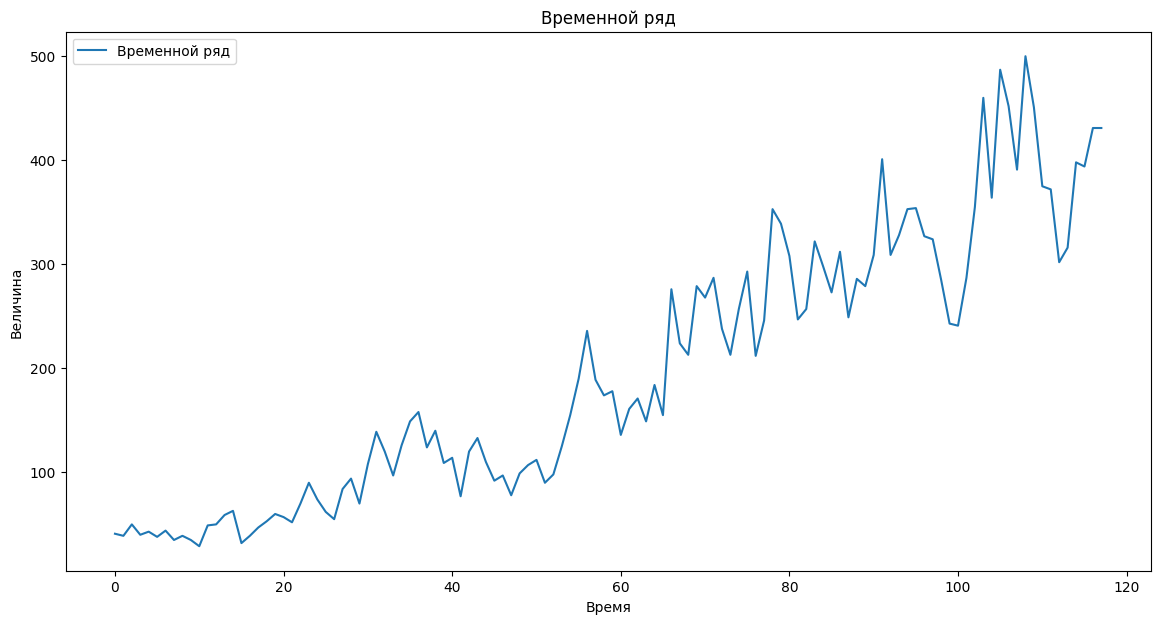

In [7]:
# еще раз на него посмотрим
chart(series)

##Модель ARIMA

Воспользуюсь оригинальным рядом. Т.к. данная модель приводит к стационарности самостоятельно.

In [25]:
# загрузим библиотеки
from statsmodels.tsa.arima.model import ARIMA
import itertools

In [32]:
# отключаем сообщения об ошибках
import warnings
warnings.filterwarnings('ignore')

# для поиска наилучших параметров воспользуемся поиском по сетке
p = range(0,10)
d = q = range(0,3)
pdq = list(itertools.product(p, d, q))
print(f'Всего рассмотрим {len(pdq)} вариантов')
best_pdq = (0,0,0)

# для поиска лучшей модели воспользуемся информационным критерием aic.
# AIC — Akaike Information Criterion). AIC оценивает, насколько хорошо модель подходит под данные.
# чем меньше AIC – тем точнее модель
best_aic = np.inf

for params in pdq:
    model_test = ARIMA(series, order=params)
    result_test = model_test.fit()

    if result_test.aic < best_aic:
        best_pdq = params
        best_aic = result_test.aic
        result = result_test
print(best_pdq, best_aic)

Всего рассмотрим 90 вариантов
(9, 2, 2) 1181.730064983864


In [33]:
# проверим оптимальность модели
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Count   No. Observations:                  118
Model:                 ARIMA(9, 2, 2)   Log Likelihood                -578.865
Date:                Mon, 24 Feb 2025   AIC                           1181.730
Time:                        07:23:36   BIC                           1214.773
Sample:                             0   HQIC                          1195.144
                                - 118                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2643      0.150      1.767      0.077      -0.029       0.557
ar.L2         -0.1599      0.105     -1.518      0.129      -0.366       0.047
ar.L3          0.0541      0.101      0.536      0.592      -0.144       0.252
ar.L4         -0.2364      0.101     -2.349      0.019      -0.434      -0.039
ar.L5          0.0199      0.098      0.204      0.839      -0.171       0.211
ar.L6         -0.1804      0.104     -1.738      0.082      -0.384       0.023
ar.L7         -0.2152      0.117     -1.835      0.067      -0.445       0.015
ar.L8          0.0112      0.110      0.102      0.919      -0.204       0.226
ar.L9         -0.2334      0.122     -1.906      0.057      -0.473       0.007
ma.L1         -1.6461      0.166     -9.888      0.000      -1.972      -1.320
ma.L2          0.6546      0.168      3.889      0.000       0.325       0.985
sigma2      1179.1477    141.552      8.330      0.000     901.711    1456.585
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                21.93
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               6.79   Skew:                             0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Здесь нас интересует таблица коэффициентов. Столбец coef показывает влияние каждого параметра на временной ряд, а P>|z| — значимость. Чем ближе значение P>|z| к нулю, тем выше значимость.

Вторым методом модели, который может помочь в оценке модели — plot_diagnostics().

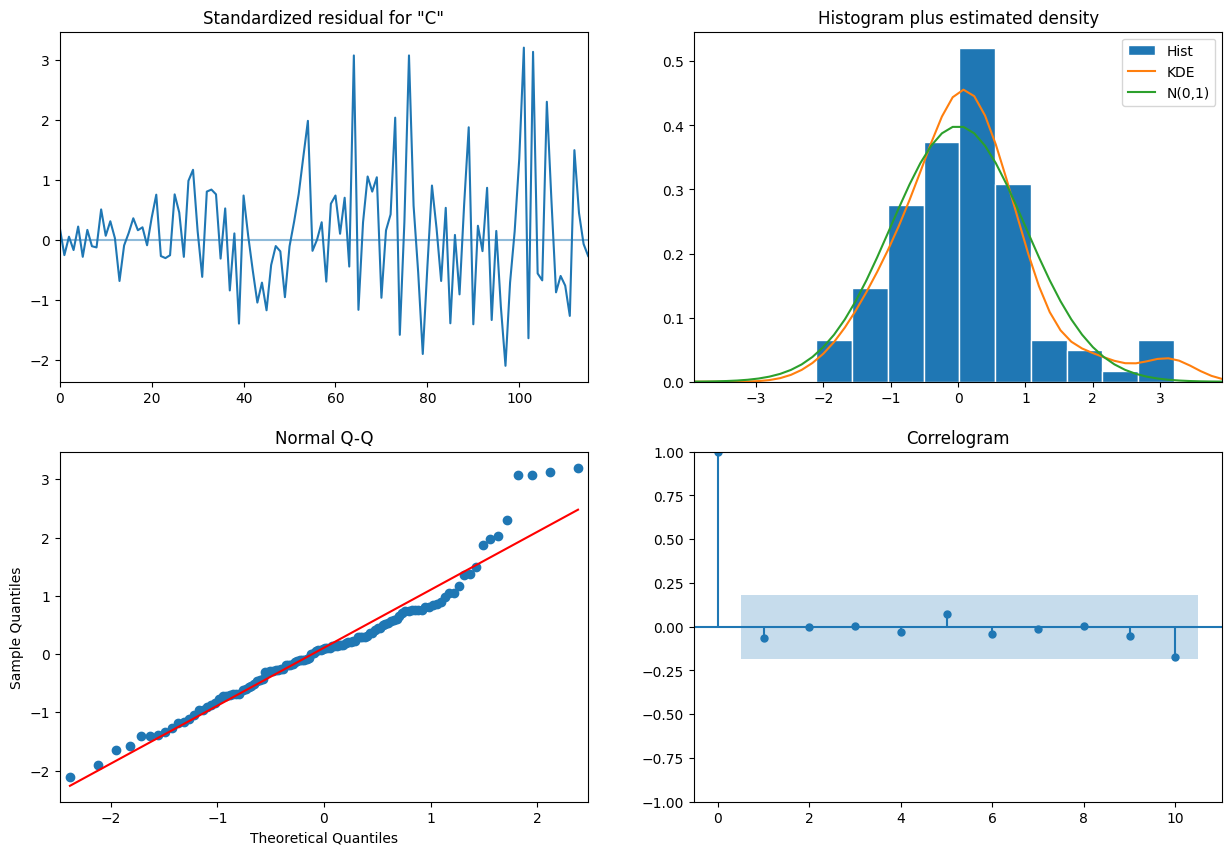

In [34]:
result.plot_diagnostics(figsize=(15, 10))
plt.show()

Остатки имеют нормальное распределение и близкую к нулю в автокорреляции.



###Прогнозирование и оценка точности прогноза.

In [35]:
series

,Count
0,41
1,39
2,50
3,40
4,43
...,...
113,316
114,398
115,394
116,431


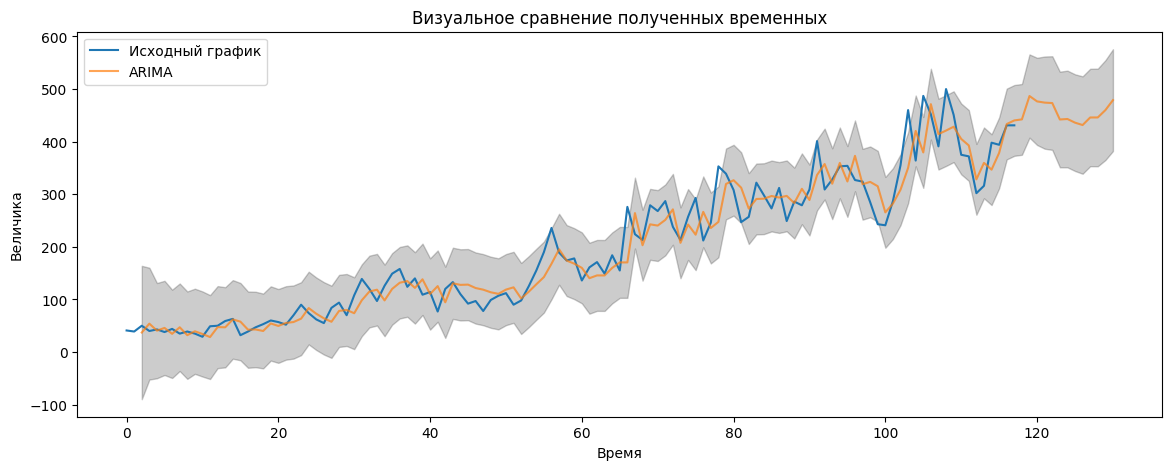

In [44]:
pred = result.get_prediction(start=2, end=130, dynamic=False)
pred_ci = pred.conf_int()

ax = series.plot(label='Исходный график', figsize=(14, 5))
pred.predicted_mean.plot(ax=ax, label='ARIMA', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.title('Визуальное сравнение полученных временных')
ax.set_xlabel('Время')
ax.set_ylabel('Величика')
plt.legend()
plt.show()

Рассмотрим среднюю абсолютную процентную ошибку (MAPE – Mean Absolute Percent Error):

In [51]:
forecasted = pred.predicted_mean
actual = series
mape = np.mean(np.abs((actual-forecasted)/actual))
mape

0.1548433222728942